### Using Real-world Images - Parte 2

**OBS.: NO COLAB, UTILIZE UMA MÁQUINA COM GPU PARA ESTE EXEMPLO**

### Lab 02: Dados para validação

Agora vamos explorar o uso de dados de validação no treinamento. A inclusão desse conjunto de dados, permite que a performance do modelo seja monitorada durante o treinamento ao expô-lo à dados não vistos.

Vamos recomeçar, para poder rodar este código independentemente das célular anteriores.

Importando as bibliotecas necessárias

In [25]:
import os
import random
import numpy as np

# Para plotar e lidar com imagens:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf

#### Inspecionando os Datasets

Definimos os diretórios com as imagens, desta vez, incluindo os dados de validação, na pasta `validation-horse-or-human`.

##### Para o colab:

In [32]:
# Montando o drive
from google.colab import drive
drive.mount('/content/drive')

# Pasta do curso:
course_dir = "/content/drive/MyDrive/Cursos/Introduction to TensorFlow for AI, ML, and DL/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
# Pasta onde as imagens para treinamento estão, deve ser o caminho para a pasta "horse-or-human"
TRAIN_DIR = course_dir+'data/horse-or-human'
# Pasta onde as imagens para validação estão, deve ser o caminho para a pasta "validation-horse-or-human"
VAL_DIR = course_dir+'data/validation-horse-or-human'

##### Para o jupyter:

In [26]:
# Pasta do curso:
course_dir = os.getcwd()

# Pasta onde as imagens para treinamento estão, deve ser o caminho para a pasta "horse-or-human"
TRAIN_DIR = course_dir+'\\data\\horse-or-human'

# Pasta onde as imagens para treinamento estão, deve ser o caminho para a pasta "horse-or-human"
TRAIN_DIR = course_dir+'\\data\\horse-or-human'
# Pasta onde as imagens para validação estão, deve ser o caminho para a pasta "validation-horse-or-human"
VAL_DIR = course_dir+'\\data\\validation-horse-or-human'

##### Setando o caminho correto

In [27]:
# Pasta com as imagens de cavalos para o treinamento
train_horse_dir = os.path.join(TRAIN_DIR, 'horses')
# Pasta com as imagens de hunanos para o treinamento
train_human_dir = os.path.join(TRAIN_DIR, 'humans')

# Pasta com as imagens de cavalos para a validação
validation_horse_dir = os.path.join(VAL_DIR, 'horses')
# Pasta com as imagens de humanos para a validação
validation_human_dir = os.path.join(VAL_DIR, 'humans')

Alguns dos nomes de imagens nas pastas:

In [28]:
train_horse_names = os.listdir(train_horse_dir)
print(f'Conjunto de treino (cavalos): \n{train_horse_names[:10]}\n')

train_human_names = os.listdir(train_human_dir)
print(f'Conjunto de treino (humanos): \n{train_human_names[:10]}\n')

validation_horse_names = os.listdir(validation_horse_dir)
print(f'Conjunto de validação (cavalos): \n{validation_horse_names[:10]}\n')

validation_human_names = os.listdir(validation_human_dir)
print(f'Conjunto de validação (humanos): \n{validation_human_names[:10]}\n')

Conjunto de treino (cavalos): 
['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']

Conjunto de treino (humanos): 
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']

Conjunto de validação (cavalos): 
['horse1-000.png', 'horse1-105.png', 'horse1-122.png', 'horse1-127.png', 'horse1-170.png', 'horse1-204.png', 'horse1-224.png', 'horse1-241.png', 'horse1-264.png', 'horse1-276.png']

Conjunto de validação (humanos): 
['valhuman01-00.png', 'valhuman01-01.png', 'valhuman01-02.png', 'valhuman01-03.png', 'valhuman01-04.png', 'valhuman01-05.png', 'valhuman01-06.png', 'valhuman01-07.png', 'valhuman01-08.png', 'valhuman01-09.png']



Verificando o número total de imagens de cada classe em cada uma das pastas:

In [29]:
print(f'Total de imagens de cavalos para treinamento: {len(os.listdir(train_horse_dir))}')
print(f'Total de imagens de humanos para treinamento: {len(os.listdir(train_human_dir))}')
print(f'Total de imagens de cavalos para validação: {len(os.listdir(validation_horse_dir))}')
print(f'Total de imagens de humanos para validação: {len(os.listdir(validation_human_dir))}')

Total de imagens de cavalos para treinamento: 500
Total de imagens de humanos para treinamento: 527
Total de imagens de cavalos para validação: 128
Total de imagens de humanos para validação: 128


Dando uma olhada nas imagens, caso queira:

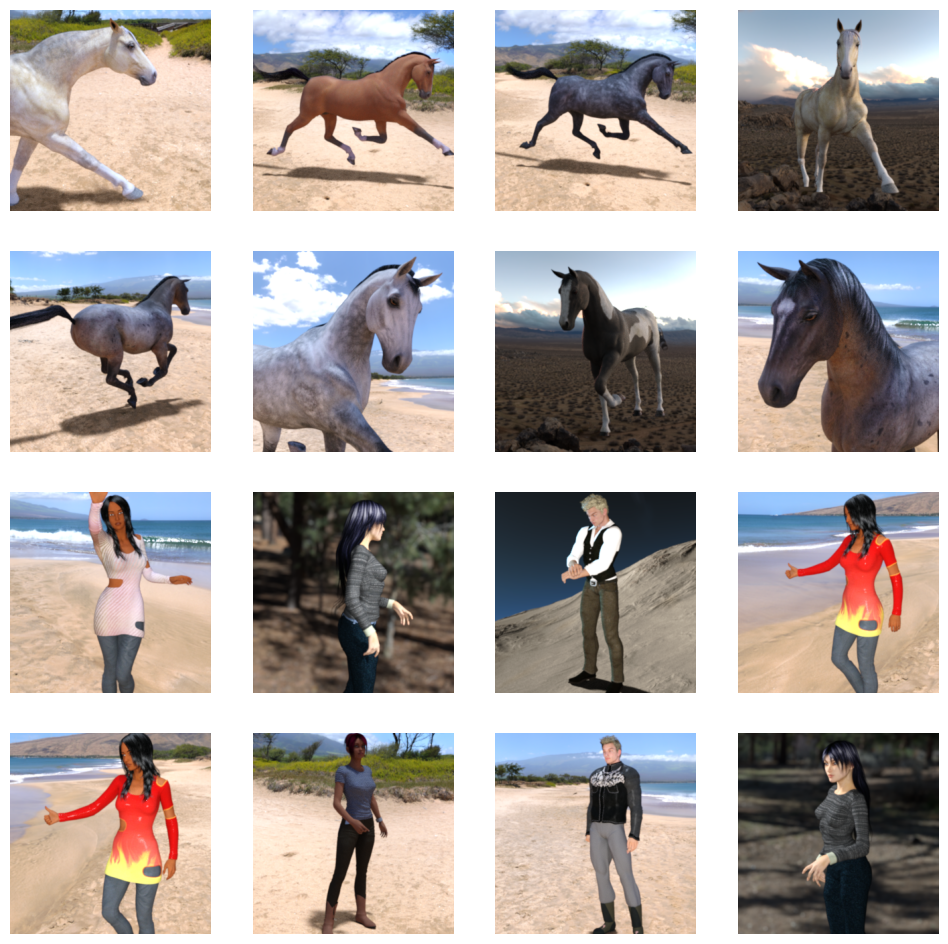

In [30]:
# Parâmetros para o gráfico (as imagens serão colocadas em uma configuração 4x4)
nrows = 4
ncols = 4

# Criando uma figura do matplotlib e setando para que o tamanho consiga caber imagens 4x4
fig = plt.gcf()
fig.set_size_inches(ncols * 3, nrows * 3)

next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in random.sample(train_horse_names, k=8)]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in random.sample(train_human_names, k=8)]

for i, img_path in enumerate(next_horse_pix + next_human_pix):
    # Cria um subplot, o índice do subplot começa em 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Não mostra eixos ou linhas de grade

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

#### Definindo nosso modelo:

Podemos manter o mesmo modelo usado sem o conjunto de validação, a única mudança ocorre na etapa de treinamento `model.fit()`.

In [31]:
model = tf.keras.models.Sequential([
    # Note que o formato da entrada é o formato da imagem no dataset, de 300x300 com 3 bytes de cor
    tf.keras.Input(shape=(300, 300, 3)),
    # Primeira convolução
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Segunda convolução
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Terceira convolução
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Quarta convolução
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Quinta convolução
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Passa os resultados para um vetor unidimensional, para dar de entrada à rede densa
    tf.keras.layers.Flatten(),
    # 512 neurônios na camada oculta
    tf.keras.layers.Dense(512, activation='relu'),
    # Somente 1 neurônio de saída. Nele estará o valor 0 ou 1, sendo 0 para 'cavalos' e 1 para 'humanos'
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [32]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

#### Pré-processamento dos dados:

Além do `train_dataset`, teremos outra estrutura `tf.data.Dataset` para os dados de validação, que devem sofrer as mesmas transformações que fizemos nos dados de treino anteriormente: normalização e configuração com `cache()` e `prefetch()`, mas não é necessário embaralhar os dados de validação com o `shuffle()`.

In [33]:
# Instancia o dataset de treinamento
train_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    image_size=(300, 300),
    batch_size=32,
    label_mode='binary'
)

# Instancia o dataset de validação
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    VAL_DIR,
    image_size=(300, 300),
    batch_size=32,
    label_mode='binary'
)

Found 1027 files belonging to 2 classes.
Found 256 files belonging to 2 classes.


In [34]:
# Definindo a camada de redimensionamento
rescale_layer = tf.keras.layers.Rescaling(scale=1./255)

# Normaliza as imagens usando a função lambda
train_dataset_scaled = train_dataset.map(lambda image, label: (rescale_layer(image), label))
validation_dataset_scaled = validation_dataset.map(lambda image, label: (rescale_layer(image), label))

In [35]:
SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

# Configura o dataset de treinamento
train_dataset_final = (train_dataset_scaled
                       .cache()
                       .shuffle(SHUFFLE_BUFFER_SIZE)
                       .prefetch(PREFETCH_BUFFER_SIZE)
                      )

# Configura o dataset de validação
validation_dataset_final = (validation_dataset_scaled
                           .cache()
                           .prefetch(PREFETCH_BUFFER_SIZE)
)

#### Treinamento

Além dos argumentos usados vamos ter de estabelecer o `validation_data`, ao qual basta informar o nome do nosso conjunto de validação. Como o formato dos dados de validação também são do tipo `tf.data.Dataset` não é preciso informar labels e imagens separadamente.

Agora, durante o treinamento, além de informar a acurácia e a perda do treinamento, também serão informadas a acurácia e a perda nos dados de validação.

In [36]:
history = model.fit(
    train_dataset_final,
    epochs=15,
    validation_data = validation_dataset_final,
    verbose=2
)

Epoch 1/15
33/33 - 48s - loss: 0.7019 - accuracy: 0.5550 - val_loss: 0.7413 - val_accuracy: 0.5195 - 48s/epoch - 1s/step
Epoch 2/15
33/33 - 41s - loss: 0.4577 - accuracy: 0.8364 - val_loss: 1.8323 - val_accuracy: 0.6250 - 41s/epoch - 1s/step
Epoch 3/15
33/33 - 43s - loss: 0.2914 - accuracy: 0.8987 - val_loss: 1.6079 - val_accuracy: 0.7773 - 43s/epoch - 1s/step
Epoch 4/15
33/33 - 43s - loss: 0.1204 - accuracy: 0.9611 - val_loss: 1.8891 - val_accuracy: 0.8242 - 43s/epoch - 1s/step
Epoch 5/15
33/33 - 42s - loss: 0.1462 - accuracy: 0.9562 - val_loss: 9.5990 - val_accuracy: 0.5938 - 42s/epoch - 1s/step
Epoch 6/15
33/33 - 43s - loss: 0.0773 - accuracy: 0.9844 - val_loss: 2.4079 - val_accuracy: 0.8203 - 43s/epoch - 1s/step
Epoch 7/15
33/33 - 43s - loss: 0.2303 - accuracy: 0.9669 - val_loss: 2.4022 - val_accuracy: 0.8086 - 43s/epoch - 1s/step
Epoch 8/15
33/33 - 43s - loss: 0.0045 - accuracy: 0.9990 - val_loss: 1.8096 - val_accuracy: 0.8516 - 43s/epoch - 1s/step
Epoch 9/15
33/33 - 43s - loss: 0

Plotando a evolução da acurácia de treino e validação em cada época de treinamento:

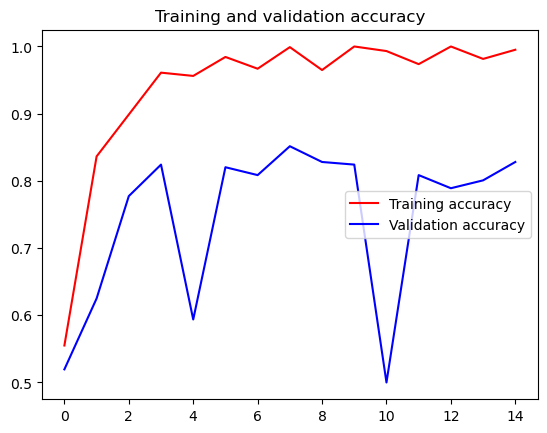

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.show()

#### Testando o modelo com imagens da internet.

##### Para o Google Colab

Abre uma pequena interface para upload das imagens para predição.

In [47]:
from google.colab import files

# Lista na qual as imagens serão armazenadas
uploaded = files.upload()

# Itera sobre as imagens para realizar a predição
for filename in uploaded.keys():
    # Imagens para predição:
    path = '/content/'+filename
    # Carrega a imagem
    image = tf.keras.utils.load_img(path, target_size=(300,300))
    image = tf.keras.utils.img_to_array(image)
    # Usa a função definida anteriormente para normalizar a imagem
    image = rescale_layer(image)
    image = np.expand_dims(image, axis=0)

    # Realiza a predição
    prediction = model.predict(image, verbose=0)[0][0]
    print(f"\nSaída do modelo: {prediction}")

    # Para nosso classificador binário, a saída é próxima a 0 para uma classe e próximo a 1 para a outra
    if prediction > 0.5:
        print(filename + " é um humano.")
    else:
        print(filename + " é um cavalo.")

Saving animal-4402382_1280.jpg to animal-4402382_1280 (1).jpg
Saving horse-1139142_1280.jpg to horse-1139142_1280 (2).jpg
Saving horse-8472924_1280.jpg to horse-8472924_1280 (2).jpg
Saving human-3782189_1280.jpg to human-3782189_1280 (2).jpg
Saving man-8493244_1280.jpg to man-8493244_1280 (2).jpg
Saving white-horse-1136093_1280.jpg to white-horse-1136093_1280 (2).jpg
Saving white-horse-3010129_1280.jpg to white-horse-3010129_1280 (2).jpg
Saving woman-1869158_1280.jpg to woman-1869158_1280 (2).jpg
Saving woman-5948094_1280.jpg to woman-5948094_1280 (2).jpg

Saída do modelo: 7.141219975892454e-05
animal-4402382_1280 (1).jpg é um cavalo.

Saída do modelo: 3.809990101188987e-09
horse-1139142_1280 (2).jpg é um cavalo.

Saída do modelo: 3.994856001554581e-08
horse-8472924_1280 (2).jpg é um cavalo.

Saída do modelo: 0.19112685322761536
human-3782189_1280 (2).jpg é um cavalo.

Saída do modelo: 0.9999986886978149
man-8493244_1280 (2).jpg é um humano.

Saída do modelo: 0.9977720379829407
white-h

##### Para o Jupyter

Abre uma pequena interface para upload das imagens para predição.

In [38]:
from io import BytesIO

# Widgets interativos para o jupyter:
from ipywidgets import widgets

# Cria um widget para dar upload nas imagens
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

def file_predict(filename, file, out):
    """ Faz a predição da imagem e printa a saída."""
    image = tf.keras.utils.load_img(file, target_size=(300, 300))
    image = tf.keras.utils.img_to_array(image)
    image = rescale_layer(image)
    image = np.expand_dims(image, axis=0)

    prediction = model.predict(image, verbose=0)[0][0]

    with out:
        if prediction > 0.5:
            print(filename + " é um humano.")
        else:
            print(filename + " é um cavalo.")


def on_upload_change(change):
    """ Pega os arquivos do widget e faz a predição."""
    # Pega o(s) arquivo(s) do upload
    items = change.new

    for item in items: # Loop para o caso de mais de um arquivo
        file_jpgdata = BytesIO(items[item]['content'])
        file_predict(items[item]['metadata']['name'], file_jpgdata, out)

# Roda o widget interativo
# Nota: após a seleção das imagens, a predição pode demorar um pouco para ser printada.
uploader.observe(on_upload_change, names='value')

FileUpload(value={}, accept='image/*', description='Upload', multiple=True)

Output()

#### Mais uma observação sobre o modelo:

**OBS.:** Os erros apresentados nos modelos podem variar, os citados abaixo foram obtidos na execução do Google Colab, onde o resultado obtido foi: 

```
Saída do modelo: 7.141219975892454e-05
animal-4402382_1280 (1).jpg é um cavalo.

Saída do modelo: 3.809990101188987e-09
horse-1139142_1280 (2).jpg é um cavalo.

Saída do modelo: 3.994856001554581e-08
horse-8472924_1280 (2).jpg é um cavalo.

Saída do modelo: 0.19112685322761536
human-3782189_1280 (2).jpg é um cavalo.

Saída do modelo: 0.9999986886978149
man-8493244_1280 (2).jpg é um humano.

Saída do modelo: 0.9977720379829407
white-horse-1136093_1280 (2).jpg é um humano.

Saída do modelo: 0.14325876533985138
white-horse-3010129_1280 (2).jpg é um cavalo.

Saída do modelo: 5.958839028608054e-05
woman-1869158_1280 (2).jpg é um cavalo.

Saída do modelo: 0.999972939491272
woman-5948094_1280 (2).jpg é um humano.
```

**Continuação OBS.:** Podemos ver que na segunda execução, realizada no Jupyter, os resultados obtidos foram um pouco diferente, como o homem de bigode, que ao contrário do modelo obtido no Colab, foi corretamente classificado como humano. Essas diferenças entre múltiplas execuções já vem sendo citadas nos notebooks deste curso, mas aqui fica ainda mais evidente, já que as imagens de teste são menos controladas em relação às dos notebooks anteriores.

Agora para a análise, assim como no modelo anterior, alguns cavalos foram classificados como humanos. Ainda, neste modelo, alguns humanos foram classificados como cavalos.

Porém, nem sempre é possível determinar a razão exata do erro, como tentamos fazer antes, justificando a classificação dos cavalos como humanos por estes estarem de frente para a câmera ou apenas com a cabeça aparecendo na imagem.

A afirmação anterior foi fruto de uma observação ao testar o modelo com múltiplas imagens, também do dataset de validação, onde todas as imagens testadas com cavalos de frente resultaram num erro de classificação.

No caso dos atuais erros, não foi encontrado um padrão pelo qual se possa justificar o erro. Podemos apenas expor as imagens que apresentaram erros de classificação:

<img src="https://cdn.pixabay.com/photo/2018/10/29/21/46/human-3782189_1280.jpg" width="500"></img>

<img src="https://cdn.pixabay.com/photo/2016/01/12/16/51/white-horse-1136093_1280.jpg" width="500"></img>

<img src="https://cdn.pixabay.com/photo/2016/11/29/11/24/woman-1869158_1280.jpg" width="500"></img>

#### Visualizando as representações intermediárias das camadas de convolução

Plotando como as features são transformadas ao longo de cada camada.

C:\Users\lara2\AppData\Local\Temp\ipykernel_6128\3275764296.py:39: RuntimeWarning: invalid value encountered in divide
  x /= x.std()


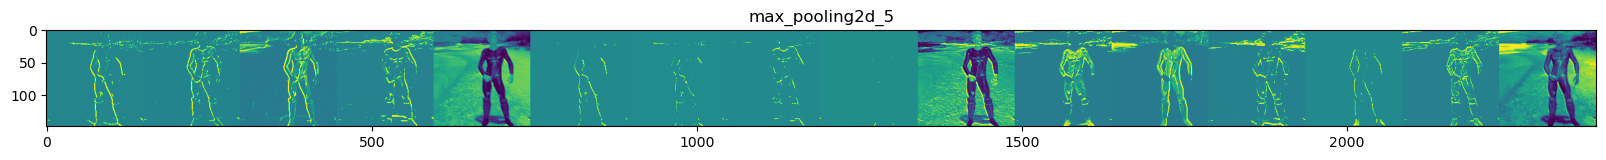

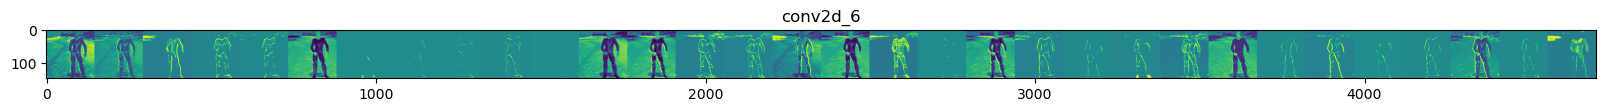

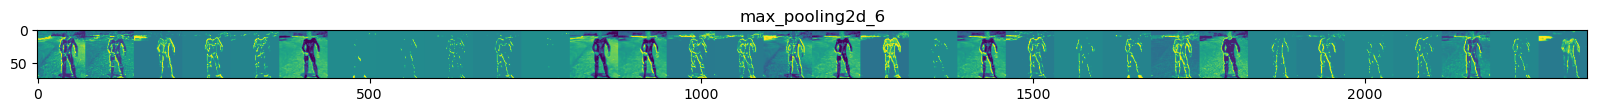

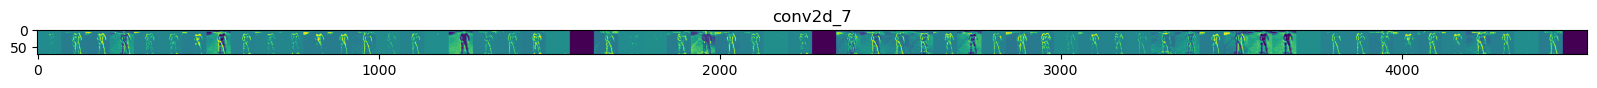

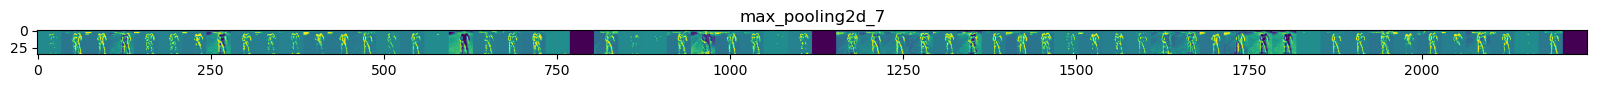

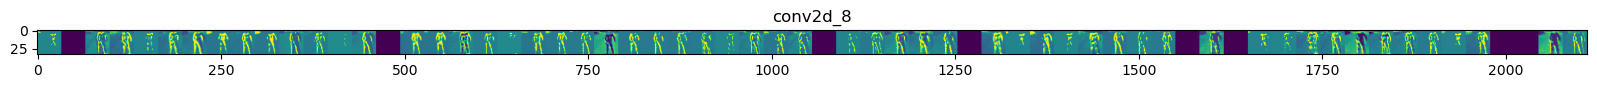

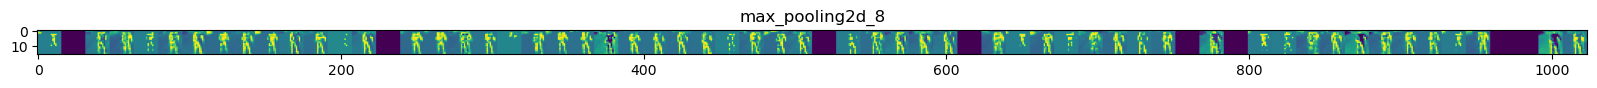

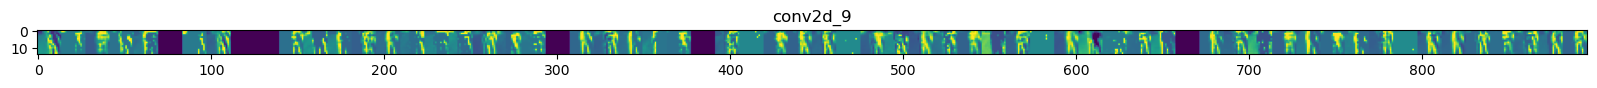

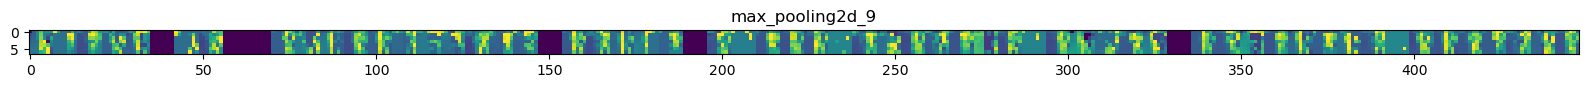

In [39]:
# Definindo um novo modelo que recebe uma imagem e tem como saída as
# representações intermediárias de cada camada no modelo anterior (com excessão da 1a)
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.inputs, outputs = successive_outputs)

# Preparando uma imagem aleatória do conjunto de treinamento
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = tf.keras.utils.load_img(img_path, target_size=(300, 300)) # Imagem do tipo PIL
x = tf.keras.utils.img_to_array(img)  # Vetor numpy de formato (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Vetor numpy de formato (1, 300, 300, 3)

# Reescala por 1/255
x = rescale_layer(x)

# Passa a imagem pela rede, obtendo todas as representações intermediárias para esta imagem
successive_feature_maps = visualization_model.predict(x, verbose=False)

# Obtendo os nomes das camadas para usar como título dos plots
layer_names = [layer.name for layer in model.layers[1:]]

# Plota as representações
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:

        # Pega somente as camadas de convolução e maxpool, e não as totalmente conectadas
        n_features = feature_map.shape[-1]  # number of features in feature map

        # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]

        # Tile the images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')

            # Tile each filter into this big horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x

        # Display the grid
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')